# Importing a CSV file into a table using Pandas

In [1]:
import pandas as pd
import sqlite3
from pandas.io import sql
import subprocess

NOTE:  The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes.

In [2]:
conn = sqlite3.connect('./../../data/tecktrack.db')

In [3]:
c = conn.cursor()

In [4]:
c.execute('DROP TABLE tecktrack')

In [5]:
c.close()

In [6]:
# In and output file paths
in_csv = './../../files/techtrack100.csv'
out_sqlite = './../../data/tecktrack.db'

table_name = 'tecktrack' # name for the SQLite database table
chunksize = 50 # number of lines to process at each iteration

# columns thatshould be read from the CSV file
columns = ['rank','company','webpage','description','location','year_end','annual_sales_rise', 'sales_amount', 'staff', 'comments']

# Get number of lines in the CSV file
nlines = subprocess.check_output(['wc', '-l', in_csv])
nlines = int(nlines.split()[0]) 

# connect to database
cnx = sqlite3.connect(out_sqlite)

# Iteratively read CSV and dump lines into the SQLite table
for i in range(1, nlines, chunksize):   # change 0 -> 1 if your csv file contains a column header
    df = pd.read_csv(in_csv,  
            header=None,  # no header, define column header manually later
            nrows=chunksize, # number of rows to read at each iteration
            skiprows=i)   # skip rows that were already read
    
    # columns to read  
    df.columns = columns

    sql.to_sql(df, 
                name=table_name, 
                con=cnx, 
                index=False, # don't use CSV file index
                index_label='company_ix', # use a unique column from DataFrame as index
                if_exists='append') 
cnx.close()  

In [7]:
conn = sqlite3.connect('./../../data/tecktrack.db')
c = conn.cursor()

In [8]:
result = c.execute("SELECT count(*) FROM tecktrack")
print(c.fetchall())

[(100,)]


In [9]:
table_name = 'tecktrack'
index_name = 'company_idx'  # name for the new unique index
column_name = 'company'

c.execute('CREATE INDEX {ix} ON {tn}({cn})'\
        .format(ix=index_name, tn=table_name, cn=column_name))


In [10]:
result = c.execute("SELECT * FROM tecktrack WHERE company = 'Purple'")
print(c.fetchall())

[(28, 'Purple', 'http://www.purple.ai', 'Wifi services provider', 'Oldham', '18-Jan', '112.88%', '5586', 93, 'Its technology is used in every public airport in Spain and in a 21,000-capacity stadium in Miami')]


In [11]:
c.execute("SELECT * FROM tecktrack WHERE company = 'Purple'")
id_exists = c.fetchone()
if id_exists:
    print('{}'.format(id_exists))
else:
    print('{} - record does not exist'.format(id_exists))



(28, 'Purple', 'http://www.purple.ai', 'Wifi services provider', 'Oldham', '18-Jan', '112.88%', '5586', 93, 'Its technology is used in every public airport in Spain and in a 21,000-capacity stadium in Miami')


In [12]:
# Closing the connection to the database file
conn.close()

# Exporting table records to a Pandas dataframe

In [13]:
import pandas as pd
import sqlite3

## Database access using Python Functions

In [14]:
def run_query(q):
    with sqlite3.connect('./../../data/tecktrack.db') as conn:
        return pd.read_sql(q,conn)

In [15]:
def run_command(c):
    with sqlite3.connect('./../../data/tecktrack.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [16]:
def show_tables():
    q='''
    SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");
    
    '''
    return run_query(q)
    

In [17]:
show_tables()

,name,type
0,tecktrack2,table
1,tecktrack,table


In [18]:
conn.close()

In [19]:
conn = sqlite3.connect('./../../data/tecktrack.db')
c = conn.cursor()

In [20]:
# limit the number of rows retrieved to 5 rows.
df = pd.read_sql_query("SELECT * FROM tecktrack LIMIT 5;", conn)
df

,rank,company,webpage,description,location,year_end,annual_sales_rise,sales_amount,staff,comments
0,1,Plan.com,http://www.plan.com,Communications provider,Isle of Man,17-Sep,364.38%,35418,90,About 650 partners use its telecoms platform t...
1,2,PsiOxus,http://www.psioxus.com,Biotechnology developer,Oxfordshire,17-Dec,311.67%,53136,54,Received a $15m milestone payment from its dev...
2,3,CensorNet,http://www.censornet.com,Cloud security software developer,Basingstoke,17-Dec,210.17%,7535,77,"Has more than 4,000 customers, including McDon..."
3,4,thoughtonomy,http://www.thoughtonomy.com,Automation software developer,East London,18-May,205.20%,16916,100,It sells to 28 countries and 50% of revenue is...
4,5,Perkbox,http://www.perkbox.com,Employee engagement services,Central London,17-Dec,204.12%,34700,200,Acquired software platform Loyalty Bay for an ...


In [21]:
# selecting only rows for location = 'Central London'.
# number of columns limited to 3.
location_df = pd.read_sql_query("""
                           SELECT company, staff, sales_amount
                           FROM tecktrack
                           WHERE location = 'Central London'
                           """, 
                           conn)

In [22]:
location_df

,company,staff,sales_amount
0,Perkbox,200,34700
1,Verve,130,10747
2,goHenry,61,6116
3,Bizuma,48,9608
4,Depop,95,94300
5,Bought By Many,78,19727
6,Optal,65,177653
7,Infinox,48,41700
8,Carwow,127,15276
9,Receipt Bank,341,11667


In [23]:
type(location_df)

pandas.core.frame.DataFrame

In [24]:
# company serie
location_df.company

0                 Perkbox
1                   Verve
2                 goHenry
3                  Bizuma
4                   Depop
5          Bought By Many
6                   Optal
7                 Infinox
8                  Carwow
9            Receipt Bank
10              Festicket
11             GoCardless
12                  iwoca
13        Prodigy Finance
14                  Azimo
15           SuperAwesome
16         Funding Circle
17                 LoopMe
18                  Hutch
19                    MiQ
20               disguise
21                 Victor
22               Cinesite
23             LendInvest
24              Amplience
25                  Ebury
26             ZappiStore
27                   Blis
28             BookingBug
29                 Egress
30             WorldRemit
31                Dianomi
32     Leisure Pass Group
33    Kimble Applications
34         Secret Escapes
35                 Thread
Name: company, dtype: object

In [25]:
# staff serie
location_df.staff

0     200
1     130
2      61
3      48
4      95
5      78
6      65
7      48
8     127
9     341
10     88
11    165
12    200
13    133
14    115
15    130
16    790
17     91
18     51
19    561
20     59
21    113
22    699
23    128
24     85
25    628
26    128
27    186
28    117
29    115
30    440
31     25
32    105
33     78
34    850
35     60
Name: staff, dtype: int64

In [26]:
# sales_amount serie
location_df.sales_amount

0           34700
1           10747
2            6116
3            9608
4           94300
5           19727
6          177653
7           41700
8           15276
9           11667
10          35839
11          11896
12          25000
13          10273
14           5870
15          14935
16          94500
17          24493
18    8766 (2017)
19         155876
20          17971
21          41508
22          43888
23          35617
24           8147
25          47000
26          19323
27          33400
28           6937
29           9403
30          61000
31          12861
32         225803
33           9153
34          73000
35           6492
Name: sales_amount, dtype: object

## Data Visualization

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# lets plot 10 records from the dataframe.
tech_metrics_df = pd.read_sql_query("""
                           SELECT company, staff, sales_amount
                           FROM tecktrack
                           WHERE location = 'Central London'
                           LIMIT 10
                           """, 
                           conn)

In [29]:
tech_metrics_df

,company,staff,sales_amount
0,Perkbox,200,34700
1,Verve,130,10747
2,goHenry,61,6116
3,Bizuma,48,9608
4,Depop,95,94300
5,Bought By Many,78,19727
6,Optal,65,177653
7,Infinox,48,41700
8,Carwow,127,15276
9,Receipt Bank,341,11667


In [30]:
tech_metrics_df.shape

(10, 3)

In [31]:
tech_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
company         10 non-null object
staff           10 non-null int64
sales_amount    10 non-null object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


NOTE: The sales_amount column is of type object, should be converted to float to be able to plot the data into a graph. See below.

In [32]:
# conversion of the column sales_amount from object to float.
tech_metrics_df["sales_amount"] = tech_metrics_df.sales_amount.astype(float)

In [33]:
# sales_amount column has now a float datatype
tech_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
company         10 non-null object
staff           10 non-null int64
sales_amount    10 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [34]:
tech_metrics_df

,company,staff,sales_amount
0,Perkbox,200,34700.0
1,Verve,130,10747.0
2,goHenry,61,6116.0
3,Bizuma,48,9608.0
4,Depop,95,94300.0
5,Bought By Many,78,19727.0
6,Optal,65,177653.0
7,Infinox,48,41700.0
8,Carwow,127,15276.0
9,Receipt Bank,341,11667.0


Now we can plot the data into a graph. 

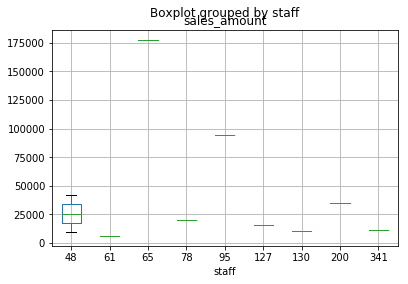

In [35]:
tech_metrics_df.boxplot(column='sales_amount', by='staff')
plt.show()

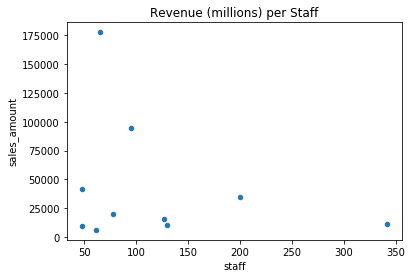

In [36]:
tech_metrics_df.plot(kind='scatter', x='staff', y='sales_amount', title='Revenue (millions) per Staff')
plt.show()

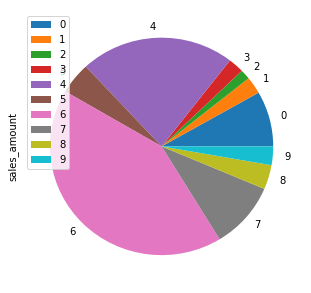

In [37]:
tech_metrics_df.plot = tech_metrics_df.plot.pie(y='sales_amount', figsize=(5, 5))
plt.show()

In [38]:
tech_metrics_df

,company,staff,sales_amount
0,Perkbox,200,34700.0
1,Verve,130,10747.0
2,goHenry,61,6116.0
3,Bizuma,48,9608.0
4,Depop,95,94300.0
5,Bought By Many,78,19727.0
6,Optal,65,177653.0
7,Infinox,48,41700.0
8,Carwow,127,15276.0
9,Receipt Bank,341,11667.0


In [39]:
# Closing the connection to the database file
conn.close()